In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
import pandas as pd
import numpy as np

import json

import nltk
from nltk.corpus import stopwords
import string

import gensim
import re

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adagrad


plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

Using TensorFlow backend.


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_faculty_webpages = pd.read_csv('../scraped_data/faculty_website_cleaned_profiles.csv')

In [5]:
df_faculty_webpages.head()

,faculty,personal_webpage_url,cleaned_str_text
0,John Ellwood,http://sph.berkeley.edu/john-ellwood,john ellwood professor emeritus research inter...
1,Iris Mauss,http://psychology.berkeley.edu//people/iris-mauss,associate professor address imauss education s...
2,Polina Lishko,https://mcb.berkeley.edu/faculty/CDB/lishkop.html,polina lishko info assistant professor cell de...
3,Michael Mahoney,http://statistics.berkeley.edu/people/michael-...,associate adjunct professor mmahoney stat dot ...
4,Brent Copen,https://gspp.berkeley.edu/directories/faculty/...,areas expertise biography


In [6]:
names = df_faculty_webpages['faculty'][df_faculty_webpages['cleaned_str_text'].notnull()]

In [15]:
glove_d = {}

with open('glove.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        l = line.strip().split(' ')
        word = l[0]
        vec = np.array([float(l[i]) for i in range(1, len(l))])
        glove_d[word] = vec

In [27]:
sentences = df_faculty_webpages['cleaned_str_text'][df_faculty_webpages['cleaned_str_text'].notnull()]
sentences = sentences.apply(lambda s:s.split(' '))

def sentence_vec(sentence):
    vec = 0
    for word in sentence:
        try:
            if word in glove_d:
                vec += glove_d[word]
        except:
            pass
    if type(vec) == int:
        return np.zeros(100) #np.nan
    else:
        return vec/len(sentence)

sentence_vecs = sentences.apply(sentence_vec)

In [36]:
X = sentence_vecs.values.tolist()

In [37]:
nn = NearestNeighbors(n_jobs=-1)
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

John Ellwood - Larry Magid | dist of 1.1244800862133977


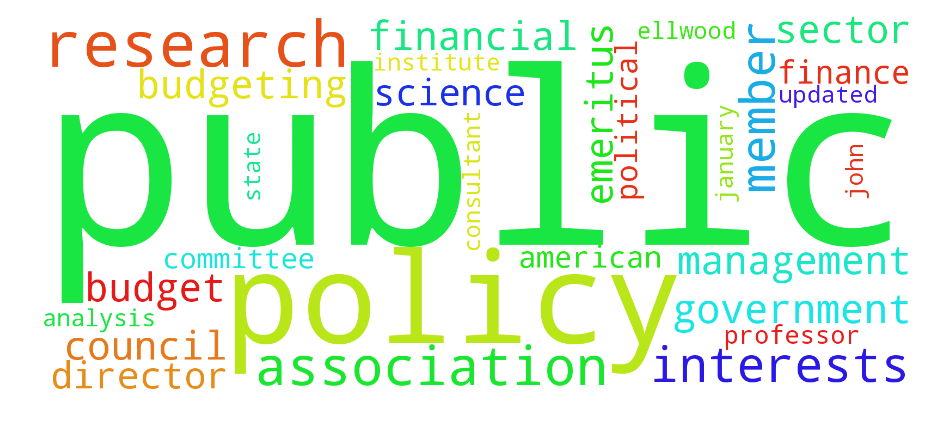

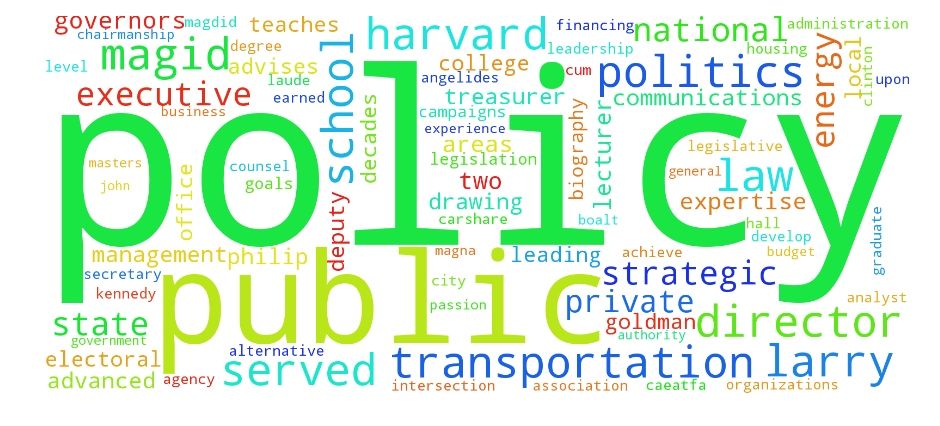

In [43]:
i = 0
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

Iris Mauss - John Kihlstrom | dist of 0.8932184755627351


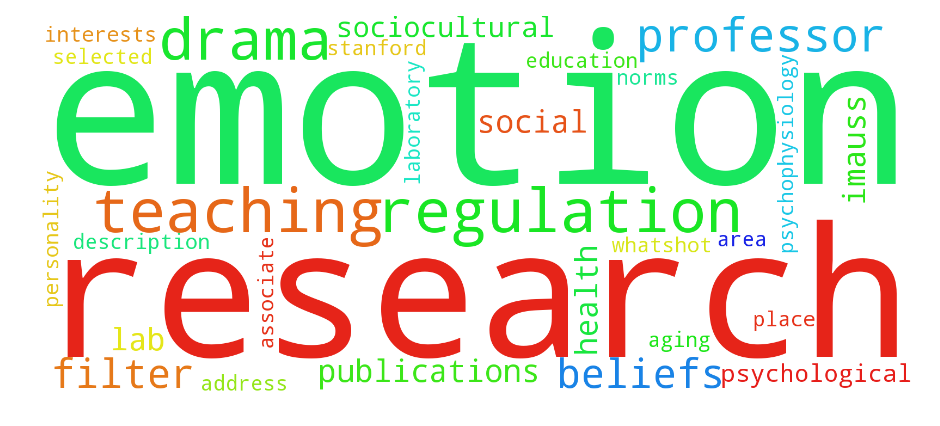

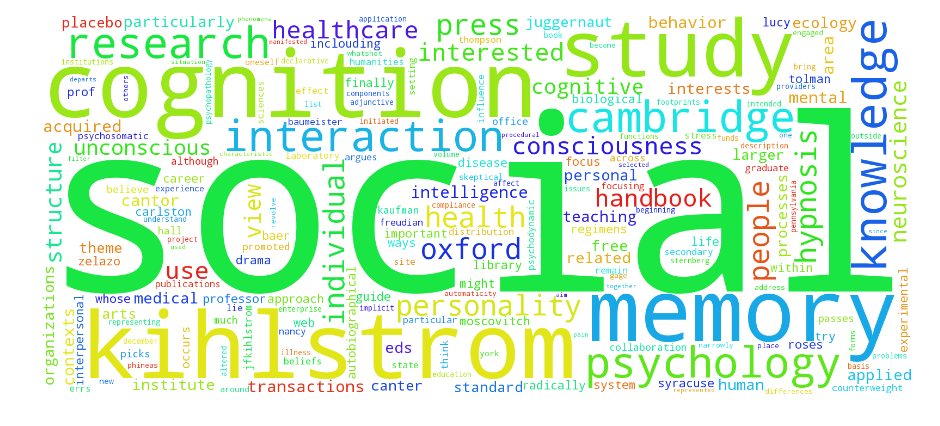

In [44]:
i = 1
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

Polina Lishko - Sheila McCormick | dist of 0.635643089529218


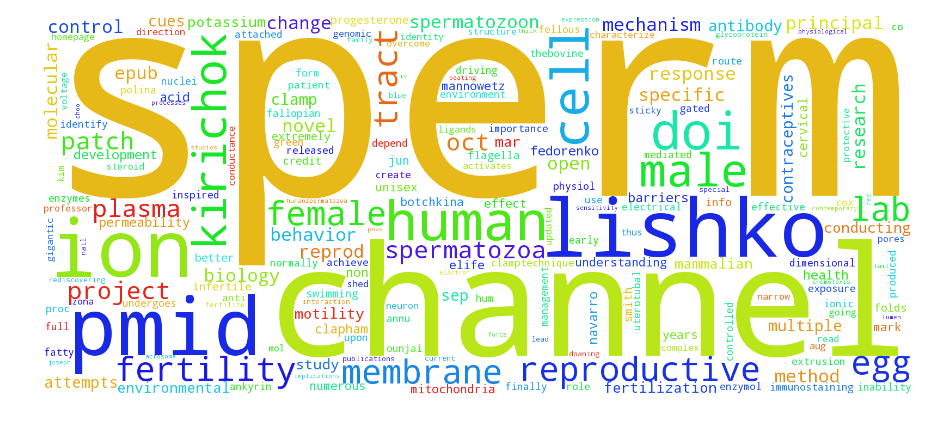

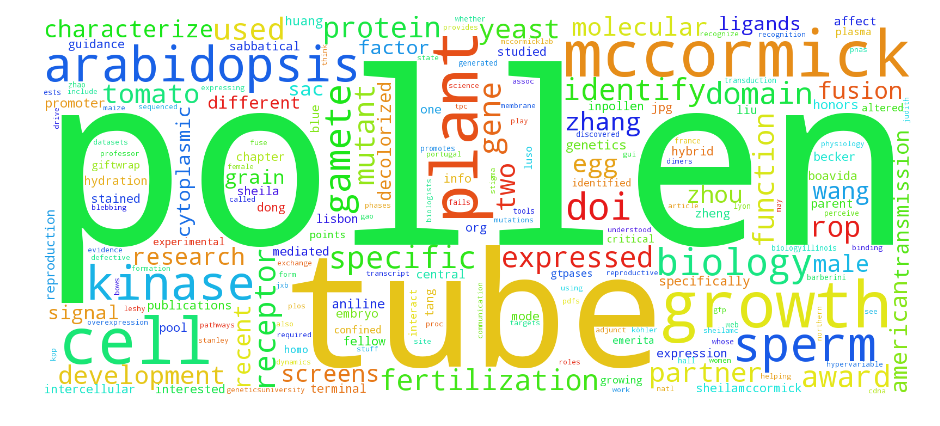

In [45]:
i = 2
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

Michael Mahoney - Kjell Doksum | dist of 0.9578352445988371


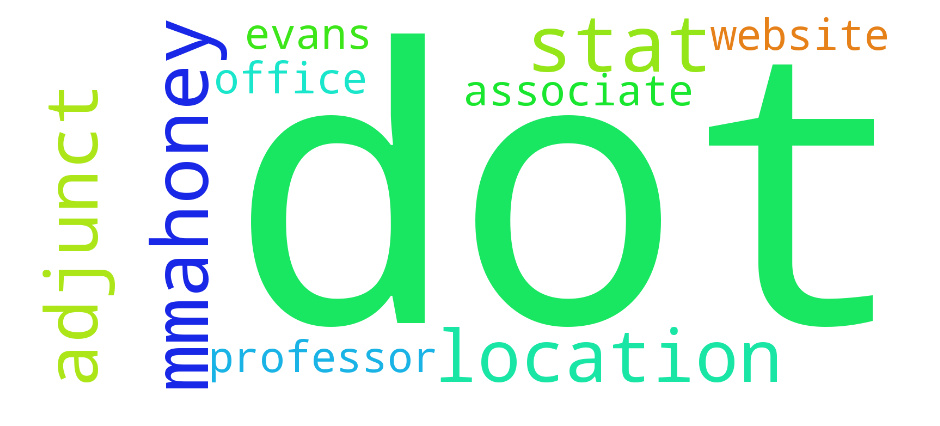

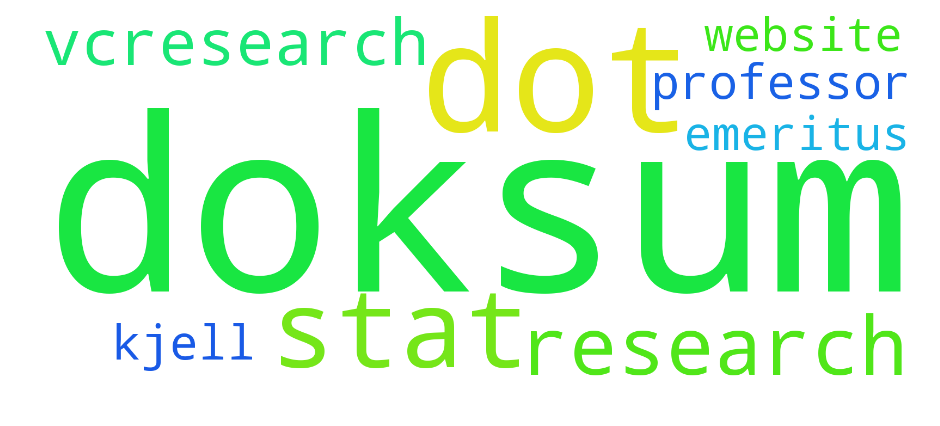

In [46]:
i = 3
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

Brent Copen - Arnold Meltsner | dist of 0.0


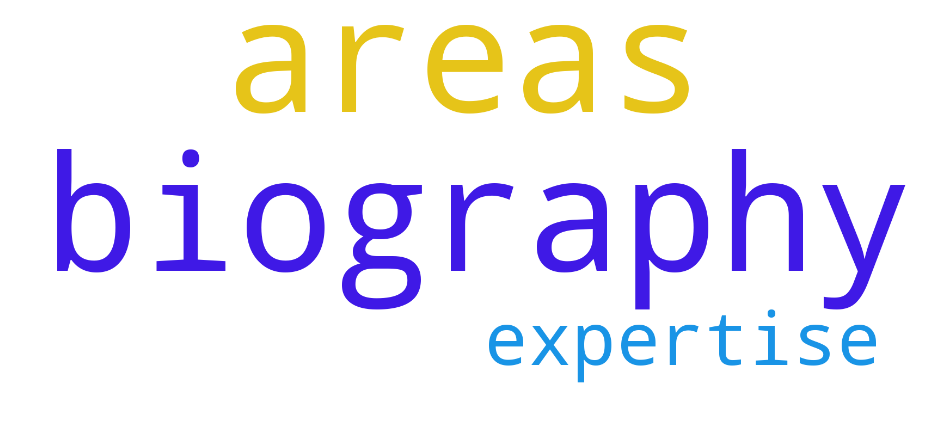

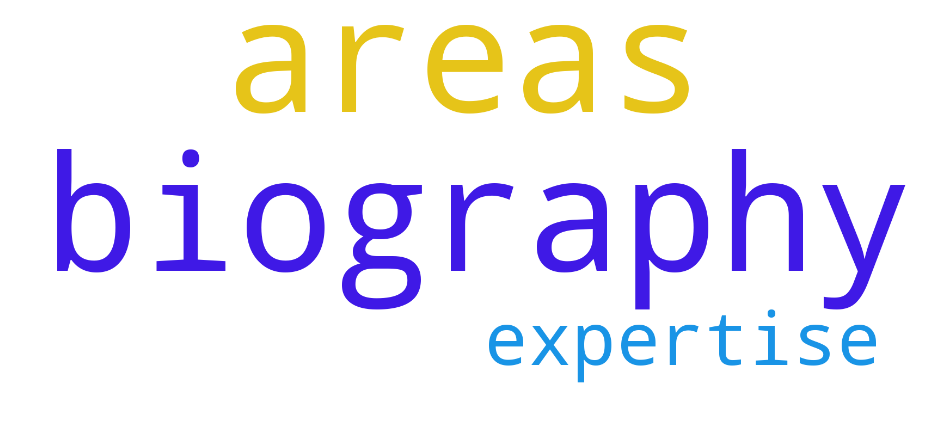

In [47]:
i = 4
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

David R. Lindberg - Jimmy A. McGuire | dist of 0.5233228423410616


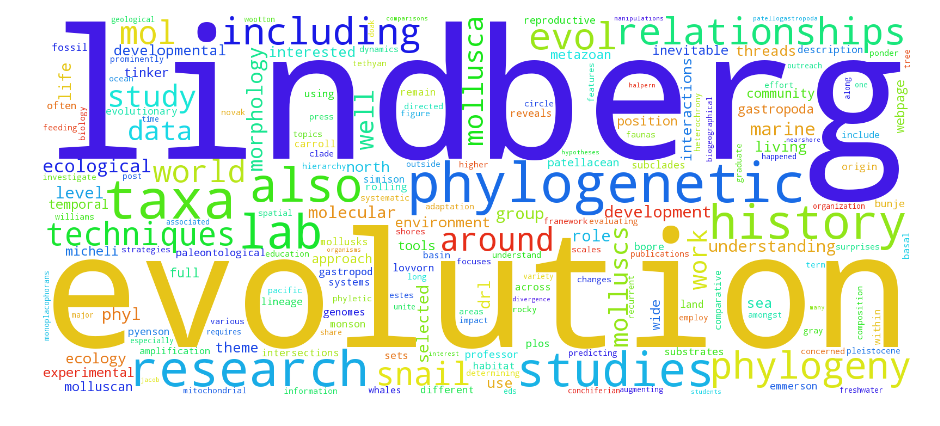

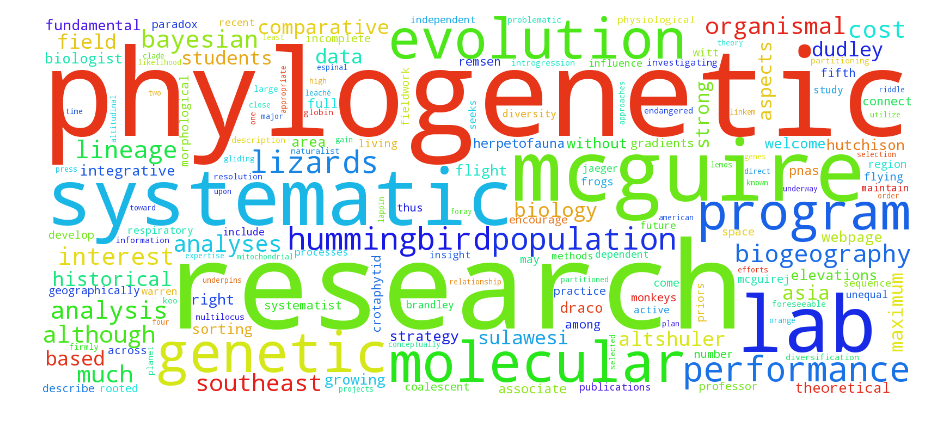

In [49]:
i = 5
dists, indicies = nn.kneighbors(X[i])
i1, i2 = indicies[0][0], indicies[0][1]

print('{} - {} | dist of {}'.format(names.iloc[i1], names.iloc[i2], dists[0][1]))

i = i1
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()

i = i2
wc = WordCloud(background_color='white', width=1600, height=700, random_state=27)\
    .generate(' '.join(sentences.iloc[i]))
plt.axis('off')
plt.imshow(wc)
plt.show()